In [2]:
import requests as rq

In [2]:
pip install requests

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
url = 'https://api.meteo.lt/v1/hydro-stations'
response = rq.get(url)
print(response)

<Response [200]>


In [14]:
url = 'https://api.meteo.lt/v1/stations'
response = rq.get(url)
stations = response.json()
print(stations)

[{'code': 'birzu-ams', 'name': 'Biržų AMS', 'coordinates': {'latitude': 56.193191, 'longitude': 24.774184}}, {'code': 'dotnuvos-ams', 'name': 'Dotnuvos AMS', 'coordinates': {'latitude': 55.395993, 'longitude': 23.866224}}, {'code': 'duksto-ams', 'name': 'Dūkšto AMS', 'coordinates': {'latitude': 55.517856, 'longitude': 26.31614}}, {'code': 'kauno-ams', 'name': 'Kauno AMS', 'coordinates': {'latitude': 54.88396, 'longitude': 23.83588}}, {'code': 'klaipedos-ams', 'name': 'Klaipėdos AMS', 'coordinates': {'latitude': 55.73135, 'longitude': 21.09157}}, {'code': 'kybartu-ams', 'name': 'Kybartų AMS', 'coordinates': {'latitude': 54.633167, 'longitude': 22.783011}}, {'code': 'laukuvos-ams', 'name': 'Laukuvos AMS', 'coordinates': {'latitude': 55.60886, 'longitude': 22.239463}}, {'code': 'lazdiju-ams', 'name': 'Lazdijų AMS', 'coordinates': {'latitude': 54.23221, 'longitude': 23.51068}}, {'code': 'nidos-ams', 'name': 'Nidos AMS', 'coordinates': {'latitude': 55.30221, 'longitude': 21.00736}}, {'code'

In [10]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\rezav\OneDrive\Stalinis kompiuteris\Duomenų mokslas\JupyterNotebooksR


In [15]:
stotys = []         
for e in stations:
    stotys.append(e['code'])

print(stotys)

['birzu-ams', 'dotnuvos-ams', 'duksto-ams', 'kauno-ams', 'klaipedos-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams', 'nidos-ams', 'panevezio-ams', 'raseiniu-ams', 'siauliu-ams', 'silutes-ams', 'telsiu-ams', 'ukmerges-ams', 'utenos-ams', 'varenos-ams', 'vilniaus-ams']


In [17]:
#  geras pavyzdys
visosTemp = []

for stotis in stotys:
    url = f'https://api.meteo.lt/v1/stations/{stotis}/observations/2024-04-18'
    response = rq.get(url)
    temp = response.json()
    sar = temp["observations"][0]["airTemperature"]
    visosTemp.append(sar)

print(visosTemp)

[1.9, 4.7, 0.5, 4.6, 3.6, 3.8, 3, 4.3, 4.6, 3.5, 1.2, 2.8, 4, 3.3, 2.5, 0.6, 1.6, 3.5]


In [19]:
#rasti 3 meteo stotis, kuriose fiksuota temperatūra 00:00 laiku buvo didžiausia:
# surinkti į sąrašą fiksuotas temperatūras šiandien, 00:00:00 laiku

df = pd.DataFrame() # sukuriamas tuscias data frame
df['stotis'] = stotys
df['temperatura'] = visosTemp
df.sort_values(by='temperatura', ascending=False).head(3)

,stotis,temperatura
1,dotnuvos-ams,4.7
8,nidos-ams,4.6
3,kauno-ams,4.6


In [21]:
 
urlStart = 'https://api.meteo.lt/v1/stations/'
ulrAms = ''
urlEnd = '/observations/2024-04-18'

urlFinal = urlStart + stotys + urlEnd

TypeError: can only concatenate str (not "list") to str

In [32]:
import math as math

['Aston Martin', 'Porsche', 'Tesla', 'Land Rover', 'Maserati'] <class 'list'>


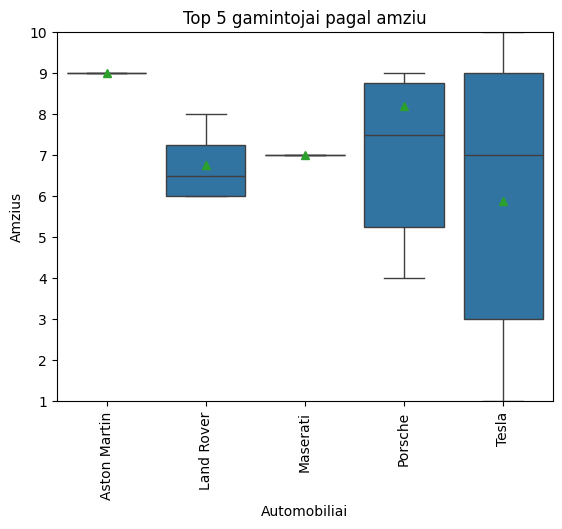

In [135]:
#nuskaitykite auto.csv failą į dataframe'ą.

auto = pd.read_csv('auto.csv', sep='|')[['gamintojas', 'modelis', 'price', 'kuro_tipas', 'rida','pagaminimo_data']]

def ConvertRida(sk):
    skInt = int(sk[:-3].replace(' ', '').replace('Nenurod', '0'))
    return skInt

auto['SuapvalintaRida'] = auto['rida'].apply(ConvertRida) 
auto['RidaInt'] = auto ['rida'].apply(ConvertRida) 

def apvalinimas(sk):
    return math.ceil(sk / 15000) * 15000

auto['SuapvalintaRida'] = auto['SuapvalintaRida'].apply(apvalinimas)

# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.
# apvalinama į aukštesnę pusę:
#  1 km turi tapti 15 000 km
# 5600 km turi tapti 15 000 km
# 15 001 km turi tapti 30 000 km
# 25 800 km turi tapti 30 000 km
# 30 001 km turi tapti 45 000 km

def ConvertKaina(sk):
    skInt = int(sk.replace(' ', ''))
    return skInt

auto['KainaInt'] = auto['price'].apply(ConvertKaina) 
auto.head(5)
# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių # kainą. (groupby, reset_index, query)
KainaVid = auto['KainaInt'].mean()

GamKainaVid = auto.groupby('gamintojas').mean(numeric_only=True).reset_index()
GamKainaVid.rename(columns={'KainaInt':'VidutinesKainos'}, inplace=True)

BrangusAuto = GamKainaVid.query('VidutinesKainos > @KainaVid').sort_values(by='VidutinesKainos', ascending=False)

# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.
Top5 = list(BrangusAuto['gamintojas'].head(5).reset_index()['gamintojas'].values)
print(Top5, type(Top5))

def ConvertAmzius(sk):
    return 2024 - int(sk[:4])

auto['amzius'] = auto['pagaminimo_data'].apply(ConvertAmzius)

VidAmzius = auto.query('gamintojas in @Top5').groupby('gamintojas').mean(numeric_only=True).reset_index()
Top5Amzius = VidAmzius.head(5)

# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.

x = auto.query('gamintojas in @Top5')

sns.boxplot(data=x.sort_values(by='gamintojas'), x='gamintojas', y='amzius', showmeans=True, showfliers=False)
plt.xticks(rotation=90)
plt.ylim(1, 10)
plt.xlabel('Automobiliai')
plt.ylabel('Amzius')
plt.title('Top 5 gamintojai pagal amziu')
# Atvaizduojame grafiką
plt.show()

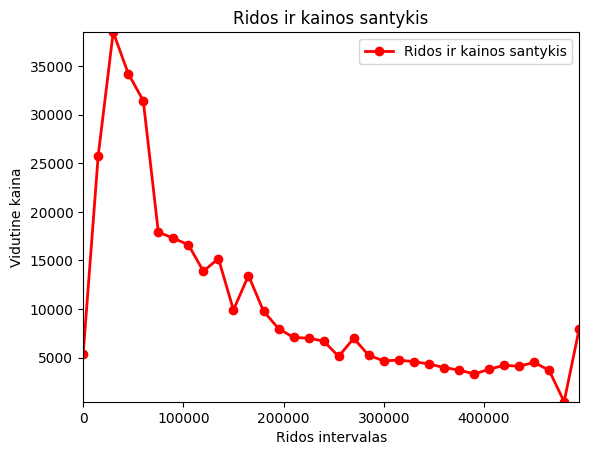

In [123]:
# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
KainaRidai = auto.query('SuapvalintaRida < 5e5').groupby('SuapvalintaRida').mean(numeric_only=True).reset_index()
KainaRidai.head(20)

# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

fig, grafikas = plt.subplots()
grafikas.plot(KainaRidai['SuapvalintaRida'], KainaRidai['KainaInt'], label="Ridos ir kainos santykis", linewidth=2, marker='o', color="red")

# Nurodome x ašies ribas
grafikas.set_xlim(KainaRidai['SuapvalintaRida'].min(), KainaRidai['SuapvalintaRida'].max())
grafikas.set_ylim(KainaRidai['KainaInt'].min(), KainaRidai['KainaInt'].max())

# Nurodome x ir y ašies pavadinimus bei grafiko pavadinimą
grafikas.set_xlabel("Ridos intervalas")
grafikas.set_ylabel("Vidutine kaina")
grafikas.set_title('Ridos ir kainos santykis')

# Įjungiame legendą
grafikas.legend()

grafikas.ticklabel_format(style='plain') # isjungiam sintific formata
# Atvaizduojame grafiką
plt.show()

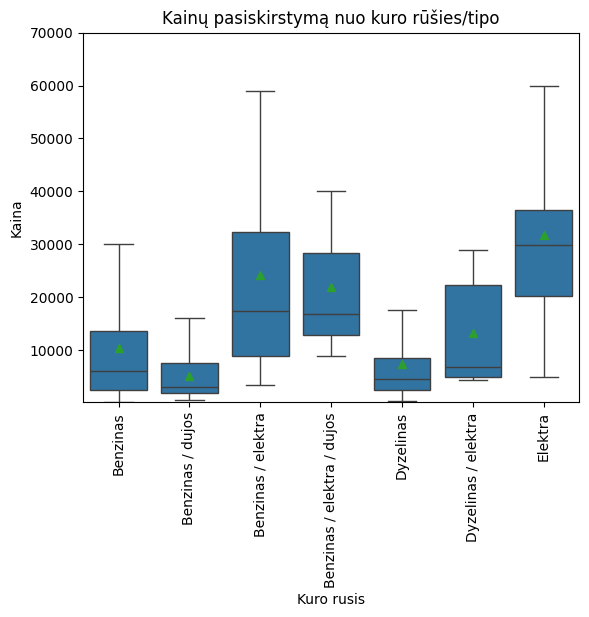

In [150]:
# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo

sns.boxplot(data=auto.sort_values(by='kuro_tipas'), x='kuro_tipas', y='KainaInt', showmeans=True, showfliers=False)

plt.xticks(rotation=90)
plt.ylim(auto['KainaInt'].min(), 70000)
plt.xlabel('Kuro rusis')
plt.ylabel('Kaina')
plt.title('Kainų pasiskirstymą nuo kuro rūšies/tipo')
# Atvaizduojame grafiką
plt.show()

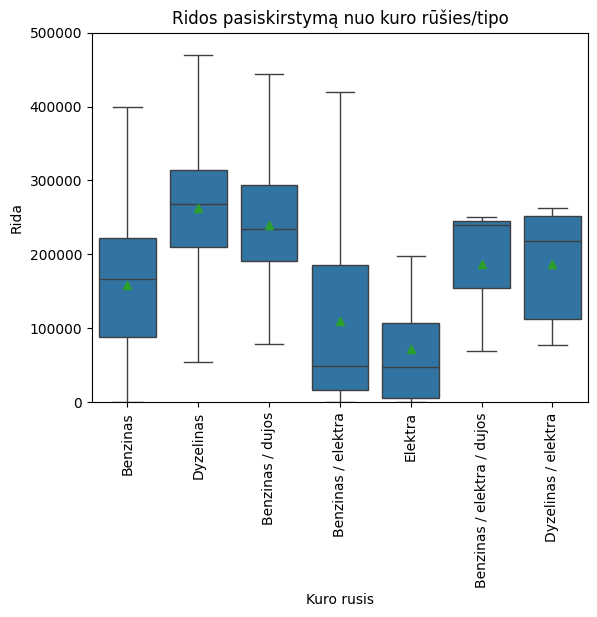

In [145]:
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo
sns.boxplot(data=auto.sort_values(by='RidaInt'), x='kuro_tipas', y='RidaInt', showmeans=True, showfliers=False)

plt.xticks(rotation=90)
plt.ylim(0,500000)
plt.xlabel('Kuro rusis')
plt.ylabel('Rida')
plt.title('Ridos pasiskirstymą nuo kuro rūšies/tipo')
# Atvaizduojame grafiką
grafikas.ticklabel_format(style='plain') # isjungiam sintific formata
plt.show()

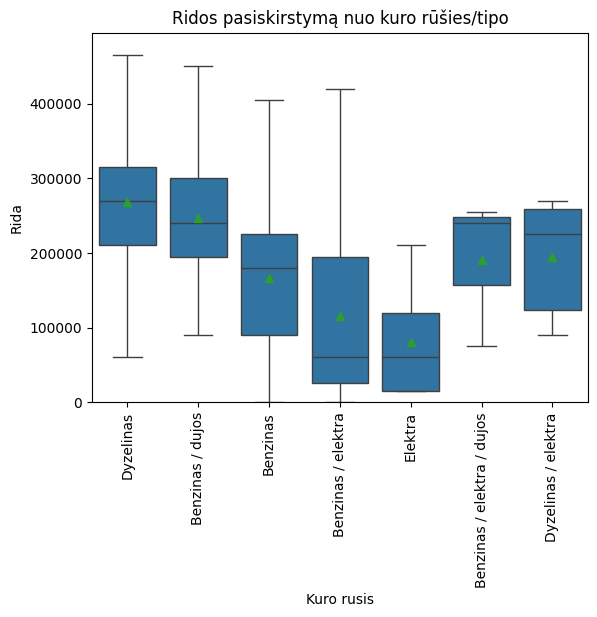

In [140]:
# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
sns.boxplot(data=auto.sort_values(by='SuapvalintaRida'), x='kuro_tipas', y='SuapvalintaRida', showmeans=True, showfliers=False)

plt.xticks(rotation=90)
plt.ylim(KainaRidai['SuapvalintaRida'].min(), KainaRidai['SuapvalintaRida'].max())
plt.xlabel('Kuro rusis')
plt.ylabel('Rida')
plt.title('Ridos pasiskirstymą nuo kuro rūšies/tipo')
# Atvaizduojame grafiką
plt.show()


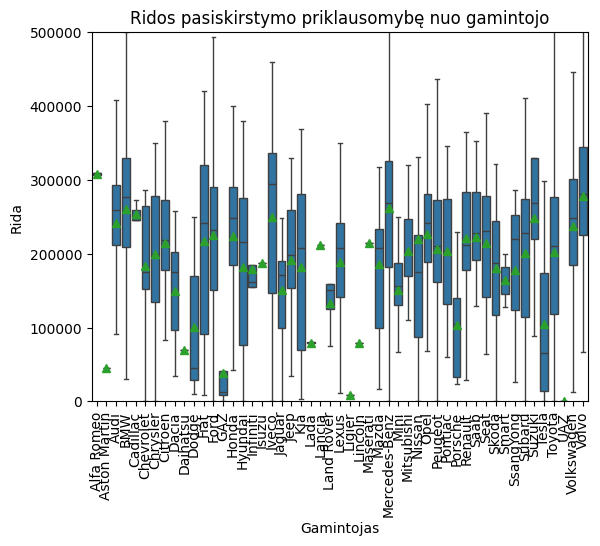

In [147]:
#  atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

sns.boxplot(data=auto.sort_values(by='gamintojas'), x='gamintojas', y='RidaInt', showmeans=True, showfliers=False)

plt.xticks(rotation=90)
plt.ylim(0, 500000)
plt.xlabel('Gamintojas')
plt.ylabel('Rida')
plt.title('Ridos pasiskirstymo priklausomybę nuo gamintojo')
# Atvaizduojame grafiką
plt.show()


In [ ]:
# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?

rida MB 180000-320000
benzinu rida 100000-220000
kaina benxinu 2000 - 14000


In [120]:
KainaRidai.head(20)


,SuapvalintaRida,KainaInt,amzius
0,0,5340.418919,17.851351
1,15000,25767.770833,11.666667
2,30000,38494.093750,5.375000
3,45000,34230.756757,5.648649
4,60000,31435.555556,10.333333
5,75000,17906.125000,9.607143
6,90000,17282.750000,11.772727
7,105000,16606.395833,9.854167
8,120000,13880.145833,11.416667
9,135000,15189.129032,11.354839


In [95]:
Top5Amzius.head(5)

,gamintojas,SuapvalintaRida,KainaInt,amzius
0,Aston Martin,45000.0,125000.000000,9.000000
1,Land Rover,138750.0,40925.000000,6.750000
2,Maserati,225000.0,34950.000000,7.000000
3,Porsche,111000.0,61999.900000,8.200000
4,Tesla,110000.0,45666.666667,5.888889


In [136]:

auto.head(3)

,gamintojas,modelis,price,kuro_tipas,rida,pagaminimo_data,SuapvalintaRida,RidaInt,KainaInt,amzius
0,BMW,M5,19 500,Benzinas,253 000 km,2005-12,255000,253000,19500,19
1,Mitsubishi,Outlander,2 700,Benzinas,195 405 km,2006,210000,195405,2700,18
2,Seat,Arona,13 490,Dyzelinas,129 800 km,2019-11,135000,129800,13490,5


In [3]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\rezav\OneDrive\Stalinis kompiuteris\Duomenų mokslas\JupyterNotebooksR


In [13]:
# #nuskaitykite auto.csv, ir pridėkite prie šios lentelės tokių stulpelių : gamintojo trys pirmos raidės didžiosiomis, 
# suskaičiuokite, kiek kiekvienas gamintojas turėjo skirtingų automobilių modelių, ADVANCED - pavaizduokite tai grafiškai. 
# Grafiko pobūdį ir kaip tai padarysite - renkatės patys. Hint - .groupby().reset_index() gali duoti lentelę. 5 daugiausia modeliu turinciu gamintoju

auto = pd.read_csv('auto.csv', sep = '|')[['gamintojas', 'modelis', 'rida', 'pagaminimo_data' ]]
auto['3Upper'] = auto['gamintojas'].str.upper().str[:3]

auto.head()

,gamintojas,modelis,rida,pagaminimo_data,3Upper
0,BMW,M5,253 000 km,2005-12,BMW
1,Mitsubishi,Outlander,195 405 km,2006,MIT
2,Seat,Arona,129 800 km,2019-11,SEA
3,Skoda,Octavia Scout,183 000 km,2015-06,SKO
4,Volvo,XC90,127 896 km,2018-08,VOL


In [22]:
gamintGr = auto.groupby('gamintojas')
gamintGr.head(5)
# (ascending=False)

,gamintojas,modelis,rida,pagaminimo_data,3Upper
0,BMW,M5,253 000 km,2005-12,BMW
1,Mitsubishi,Outlander,195 405 km,2006,MIT
2,Seat,Arona,129 800 km,2019-11,SEA
3,Skoda,Octavia Scout,183 000 km,2015-06,SKO
4,Volvo,XC90,127 896 km,2018-08,VOL
...,...,...,...,...,...
2274,Isuzu,Trooper,186 684 km,2003,ISU
2277,Lada,2103,79 257 km,1974-07,LAD
2287,Suzuki,Ignis,269 000 km,2005-12,SUZ
2360,SsangYong,Rexton,285 544 km,2005-09,SSA


In [39]:
gamintGr = auto.groupby('gamintojas')
modeliuSkTop5 = gamintGr['modelis'].nunique().sort_values(ascending=False).head(5)
modeliuSkTop5.head()


gamintojas
Mercedes-Benz    62
BMW              42
Volkswagen       28
Audi             23
Toyota           19
Name: modelis, dtype: int64

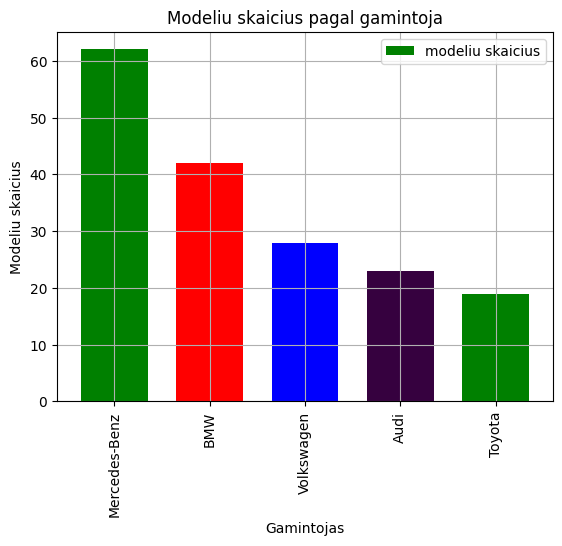

In [47]:
# ADVANCED - pavaizduokite tai grafiškai. 
# Grafiko pobūdį ir kaip tai padarysite - renkatės patys. Hint - .groupby().reset_index() gali duoti lentelę. 5 daugiausia modeliu turinciu gamintoju

# bar grafikai
fig, ax = plt.subplots()
color_list = ['green', 'red', 'blue', 'xkcd:deep purple']
modeliuSkTop5.plot(kind='bar', color=color_list, width=0.7, label='modeliu skaicius')
ax.legend(loc='best')
# ax.grid(True)
ax.set_ylabel('Modeliu skaicius')
ax.set_xlabel('Gamintojas')
ax.set_title('Modeliu skaicius pagal gamintoja')

plt.show()

In [51]:
SkirtingiModeliai = auto.groupby("gamintojas")["modelis"].value_counts().groupby("gamintojas").count().sort_values(ascending=False).head(5).reset_index()

SkirtingiModeliai.head(5)

,gamintojas,count
0,Mercedes-Benz,62
1,BMW,42
2,Volkswagen,28
3,Audi,23
4,Toyota,19


In [53]:
pip install undetected-chromedriver selenium beautifulsoup4

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/65.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.4 kB ? eta -:--:--
     ----------------- -------------------- 30.7/65.4 kB 186.2 kB/s eta 0:00:01
     -------------------------------------- 65.4/65.4 kB 351.4 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------